# IMPORTING LIBRARIES AND DATASET

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [440]:
df=pd.read_csv("/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [441]:
df["Age"].value_counts()

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64

# PERFORMING EDA

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [443]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

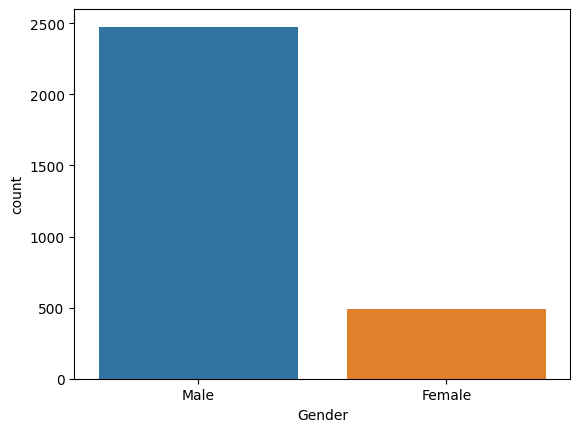

In [444]:
sns.countplot(x="Gender",data=df)

* Total Number of Males are greater than females

<Axes: title={'center': 'Stream'}>

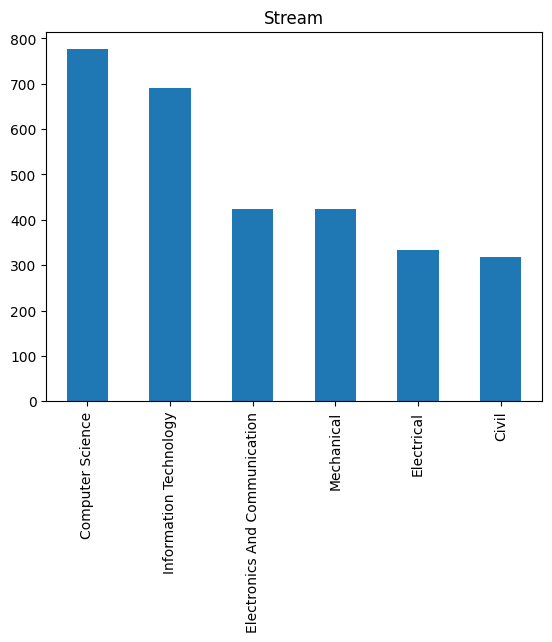

In [445]:
df ['Stream'].value_counts().plot(kind="bar",title="Stream")


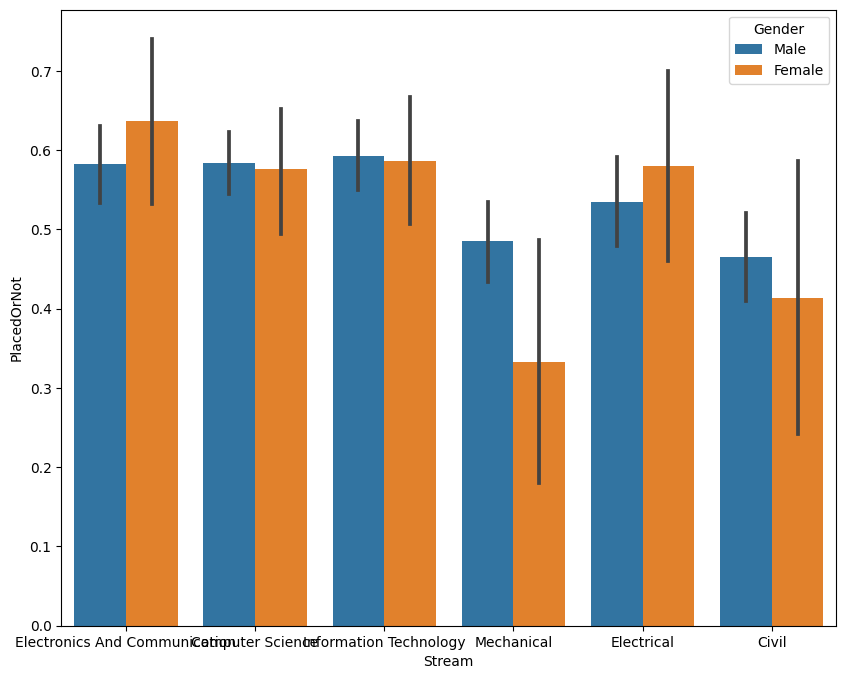

In [446]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender")
plt.show()

<Axes: >

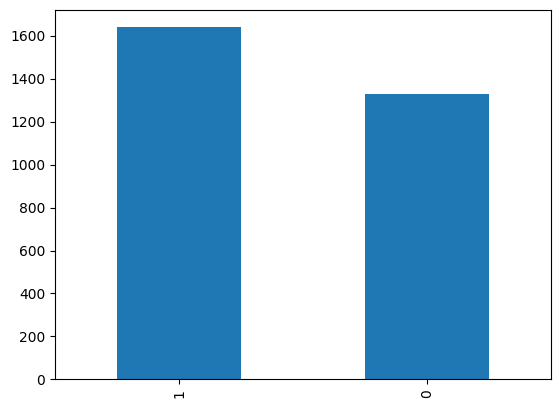

In [447]:
df["PlacedOrNot"].value_counts().plot(kind='bar')

<Axes: >

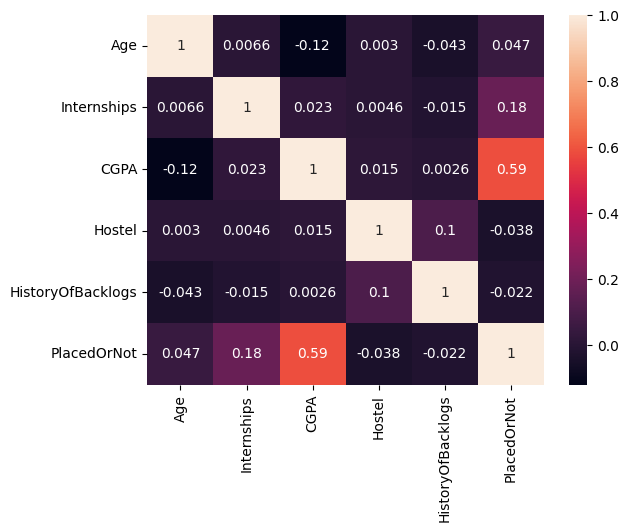

In [448]:
sns.heatmap(df.corr(),annot = True)

From the heatmap we can conclude that CGPA is highly correleated to our dependent variable than other independent variables.

Hostel Column shows 0 correlation so it can be dropped.

In [449]:
df.drop("Hostel",axis=1,inplace=True)

ENCODING

In [450]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#Encoding Gender and Stream as it has object datatype.
df["Gender"]=le.fit_transform(df["Gender"])
df["Stream"]=le.fit_transform(df["Stream"])

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   HistoryOfBacklogs  2966 non-null   int64
 6   PlacedOrNot        2966 non-null   int64
dtypes: int64(7)
memory usage: 162.3 KB


# SPLITTING THE DATASET

In [452]:
x=df.iloc[:,:-1] #Indpendent Features
y=df.iloc[:,-1] #Dependent Feature

In [453]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into train and test dataset.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# APPLYING LOGISTIC REGRESSION

Logistic Regression is a process of modeling the probability of a discrete outcome given an input variable.

Logistic Regression is used when the dependent variable(target) is categorical, and consists of a single binary dependent variable,where two values are labeled “0” and “1”.

In [454]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Calculating the accuracy of different models using an user defined function.

def report(x,y):
  print("Accuracy Score : ",accuracy_score(x,y))
  print("Confusion Matrix : ",confusion_matrix(x,y))
  print("Classification Report : ",classification_report(x,y))

In [455]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train) #Training the model

LogisticRegression()

In [456]:
#Prediction

y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [457]:
#Displaying the result

report(y_train,y_pred_train_lr)

Accuracy Score :  0.7723440134907251
Confusion Matrix :  [[ 781  265]
 [ 275 1051]]
Classification Report :                precision    recall  f1-score   support

           0       0.74      0.75      0.74      1046
           1       0.80      0.79      0.80      1326

    accuracy                           0.77      2372
   macro avg       0.77      0.77      0.77      2372
weighted avg       0.77      0.77      0.77      2372



Precision 

Precision is the ability of a classifier not to label an instance positive that is actually negative.
 It is defined as the ratio of true positives to the sum of true and false positives.

Recall 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

F1-Score

The F1 score is a weighted harmonic mean of precision and recall.




In [458]:
report(y_test,y_pred_test_lr)

Accuracy Score :  0.7542087542087542
Confusion Matrix :  [[198  83]
 [ 63 250]]
Classification Report :                precision    recall  f1-score   support

           0       0.76      0.70      0.73       281
           1       0.75      0.80      0.77       313

    accuracy                           0.75       594
   macro avg       0.75      0.75      0.75       594
weighted avg       0.75      0.75      0.75       594



# APPLYING DECISION TREE

It is a rule-based approach to classification and regression problems, using the values in each feature to split the dataset to a point where all data points that have the same class are grouped together.

In [459]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=25,min_samples_split=18)
dtc.fit(x_train,y_train) #Training the model

DecisionTreeClassifier(max_depth=25, min_samples_split=18)

In [460]:
#Prediction

y_pred_train_dtc=dtc.predict(x_train)
y_pred_test_dtc=dtc.predict(x_test)

In [461]:
#Displaying the result

report(y_train,y_pred_train_dtc)

Accuracy Score :  0.9034569983136593
Confusion Matrix :  [[1000   46]
 [ 183 1143]]
Classification Report :                precision    recall  f1-score   support

           0       0.85      0.96      0.90      1046
           1       0.96      0.86      0.91      1326

    accuracy                           0.90      2372
   macro avg       0.90      0.91      0.90      2372
weighted avg       0.91      0.90      0.90      2372



In [462]:
report(y_test,y_pred_test_dtc)

Accuracy Score :  0.8787878787878788
Confusion Matrix :  [[258  23]
 [ 49 264]]
Classification Report :                precision    recall  f1-score   support

           0       0.84      0.92      0.88       281
           1       0.92      0.84      0.88       313

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594



# APPLYING RANDOM FOREST

It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [463]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=265)
rfc.fit(x_train,y_train) #Training the model

RandomForestClassifier(n_estimators=265)

In [464]:
#Prediction

y_pred_train_rfc=rfc.predict(x_train)
y_pred_test_rfc=rfc.predict(x_test)

In [465]:
#Displaying the result

report(y_train,y_pred_train_rfc)

Accuracy Score :  0.9190556492411467
Confusion Matrix :  [[1010   36]
 [ 156 1170]]
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.97      0.91      1046
           1       0.97      0.88      0.92      1326

    accuracy                           0.92      2372
   macro avg       0.92      0.92      0.92      2372
weighted avg       0.92      0.92      0.92      2372



In [466]:
report(y_test,y_pred_test_rfc)

Accuracy Score :  0.8686868686868687
Confusion Matrix :  [[252  29]
 [ 49 264]]
Classification Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87       281
           1       0.90      0.84      0.87       313

    accuracy                           0.87       594
   macro avg       0.87      0.87      0.87       594
weighted avg       0.87      0.87      0.87       594



# APPLYING KNN

The k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method.

It can be used for either regression or classification problems, working off the assumption that similar points can be found near one another.

In [467]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=55) #SQRT OF TOTAL NO OF RECORDS(55)
knn.fit(x_train,y_train) #Training the model

KNeighborsClassifier(n_neighbors=55)

In [468]:
#Prediction

y_pred_train_knn=knn.predict(x_train)
y_pred_test_knn=knn.predict(x_test)

In [469]:
#Displaying the result

report(y_train,y_pred_train_knn)

Accuracy Score :  0.8684654300168634
Confusion Matrix :  [[ 967   79]
 [ 233 1093]]
Classification Report :                precision    recall  f1-score   support

           0       0.81      0.92      0.86      1046
           1       0.93      0.82      0.88      1326

    accuracy                           0.87      2372
   macro avg       0.87      0.87      0.87      2372
weighted avg       0.88      0.87      0.87      2372



In [470]:
report(y_test,y_pred_test_knn)

Accuracy Score :  0.8484848484848485
Confusion Matrix :  [[249  32]
 [ 58 255]]
Classification Report :                precision    recall  f1-score   support

           0       0.81      0.89      0.85       281
           1       0.89      0.81      0.85       313

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.85      0.85      0.85       594



# APPLYING SVC

SVMs can be used for both regression and classification tasks.

Support vectors are data points closer to the hyperplane and influence the position and orientation of the hyperplane, helping to maximize the margin of the classifier.


In [471]:
from sklearn.svm import SVC
svc=SVC(C=100)
svc.fit(x_train,y_train) #Training the model

SVC(C=100)

In [472]:
#Prediction

y_pred_train_svc=svc.predict(x_train)
y_pred_test_svc=svc.predict(x_test)

In [473]:
#Displaying the result

report(y_train,y_pred_train_svc)

Accuracy Score :  0.8499156829679595
Confusion Matrix :  [[ 959   87]
 [ 269 1057]]
Classification Report :                precision    recall  f1-score   support

           0       0.78      0.92      0.84      1046
           1       0.92      0.80      0.86      1326

    accuracy                           0.85      2372
   macro avg       0.85      0.86      0.85      2372
weighted avg       0.86      0.85      0.85      2372



In [474]:
report(y_test,y_pred_test_svc)

Accuracy Score :  0.8585858585858586
Confusion Matrix :  [[251  30]
 [ 54 259]]
Classification Report :                precision    recall  f1-score   support

           0       0.82      0.89      0.86       281
           1       0.90      0.83      0.86       313

    accuracy                           0.86       594
   macro avg       0.86      0.86      0.86       594
weighted avg       0.86      0.86      0.86       594



# APPLYING NAIVE BAYES

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. 

It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [475]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train) #Training the model

GaussianNB()

In [476]:
#Prediction

y_pred_train_gnb=gnb.predict(x_train)
y_pred_test_gnb=gnb.predict(x_test)

In [477]:
#Displaying the result

report(y_train,y_pred_train_gnb)

Accuracy Score :  0.8145025295109612
Confusion Matrix :  [[ 894  152]
 [ 288 1038]]
Classification Report :                precision    recall  f1-score   support

           0       0.76      0.85      0.80      1046
           1       0.87      0.78      0.83      1326

    accuracy                           0.81      2372
   macro avg       0.81      0.82      0.81      2372
weighted avg       0.82      0.81      0.82      2372



In [478]:
report(y_test,y_pred_test_gnb)

Accuracy Score :  0.803030303030303
Confusion Matrix :  [[228  53]
 [ 64 249]]
Classification Report :                precision    recall  f1-score   support

           0       0.78      0.81      0.80       281
           1       0.82      0.80      0.81       313

    accuracy                           0.80       594
   macro avg       0.80      0.80      0.80       594
weighted avg       0.80      0.80      0.80       594



#APPLYING XGBOOST

In [479]:
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(n_estimators=100,tree_method='hist')
xgb_classifier.fit(x_train,y_train) #Training the model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [480]:
#Prediction

y_pred_xgb_train=xgb_classifier.predict(x_train)
y_pred_xgb_test=xgb_classifier.predict(x_test)

In [481]:
#Displaying the result

report(y_train,y_pred_xgb_train)

Accuracy Score :  0.9144182124789207
Confusion Matrix :  [[1012   34]
 [ 169 1157]]
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.97      0.91      1046
           1       0.97      0.87      0.92      1326

    accuracy                           0.91      2372
   macro avg       0.91      0.92      0.91      2372
weighted avg       0.92      0.91      0.91      2372



In [482]:
report(y_test,y_pred_xgb_test)

Accuracy Score :  0.8754208754208754
Confusion Matrix :  [[257  24]
 [ 50 263]]
Classification Report :                precision    recall  f1-score   support

           0       0.84      0.91      0.87       281
           1       0.92      0.84      0.88       313

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594



# APPLYING ADABOOST

In [483]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100,learning_rate=1) #Training the model
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [484]:
#Prediction

y_pred_ada_train=ada.predict(x_train)
y_pred_ada_test=ada.predict(x_test)

In [485]:
#Displaying the result

report(y_train,y_pred_ada_train)

Accuracy Score :  0.8705733558178752
Confusion Matrix :  [[ 981   65]
 [ 242 1084]]
Classification Report :                precision    recall  f1-score   support

           0       0.80      0.94      0.86      1046
           1       0.94      0.82      0.88      1326

    accuracy                           0.87      2372
   macro avg       0.87      0.88      0.87      2372
weighted avg       0.88      0.87      0.87      2372



In [486]:
report(y_test,y_pred_ada_test)

Accuracy Score :  0.8787878787878788
Confusion Matrix :  [[259  22]
 [ 50 263]]
Classification Report :                precision    recall  f1-score   support

           0       0.84      0.92      0.88       281
           1       0.92      0.84      0.88       313

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594



#SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique.

Imbalanced data is data in which observed frequencies are very different across the different possible values of a categorical variable. Basically, there are many observations of some type and very few of another type.

SMOTE is a solution when you have imbalanced data.

In [487]:
from imblearn.over_sampling import SMOTE
smp=SMOTE()

In [488]:
x_smote,y_smote=smp.fit_resample(x,y)

In [489]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)

# AFTER SMOTE

LOGISTIC REGRESSION


In [490]:
lr.fit(x_sm_train,y_sm_train) #Training the model

LogisticRegression()

In [491]:
#Prediction

y_pred_lr_train_sm=lr.predict(x_sm_train)
y_pred_lr_test_sm=lr.predict(x_sm_test)

In [492]:
#Displaying the result

report(y_sm_train,y_pred_lr_train_sm)
report(y_sm_test,y_pred_lr_test_sm)

Accuracy Score :  0.7734553775743707
Confusion Matrix :  [[1012  294]
 [ 300 1016]]
Classification Report :                precision    recall  f1-score   support

           0       0.77      0.77      0.77      1306
           1       0.78      0.77      0.77      1316

    accuracy                           0.77      2622
   macro avg       0.77      0.77      0.77      2622
weighted avg       0.77      0.77      0.77      2622

Accuracy Score :  0.7759146341463414
Confusion Matrix :  [[256  77]
 [ 70 253]]
Classification Report :                precision    recall  f1-score   support

           0       0.79      0.77      0.78       333
           1       0.77      0.78      0.77       323

    accuracy                           0.78       656
   macro avg       0.78      0.78      0.78       656
weighted avg       0.78      0.78      0.78       656



DECISION TREE

In [493]:
dtc.fit(x_sm_train,y_sm_train) #Training the model

DecisionTreeClassifier(max_depth=25, min_samples_split=18)

In [494]:
#Prediction

y_pred_dtc_train_sm=dtc.predict(x_sm_train)
y_pred_dtc_test_sm=dtc.predict(x_sm_test)

In [495]:
#Displaying the result

report(y_sm_train,y_pred_dtc_train_sm)
report(y_sm_test,y_pred_dtc_test_sm)

Accuracy Score :  0.9092295957284515
Confusion Matrix :  [[1267   39]
 [ 199 1117]]
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.97      0.91      1306
           1       0.97      0.85      0.90      1316

    accuracy                           0.91      2622
   macro avg       0.92      0.91      0.91      2622
weighted avg       0.92      0.91      0.91      2622

Accuracy Score :  0.9054878048780488
Confusion Matrix :  [[323  10]
 [ 52 271]]
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.97      0.91       333
           1       0.96      0.84      0.90       323

    accuracy                           0.91       656
   macro avg       0.91      0.90      0.90       656
weighted avg       0.91      0.91      0.91       656



KNN

In [496]:
knn.fit(x_sm_train,y_sm_train) #Training the model

KNeighborsClassifier(n_neighbors=55)

In [497]:
#Prediction

y_pred_knn_train_sm=knn.predict(x_sm_train)
y_pred_knn_test_sm=knn.predict(x_sm_test)

In [498]:
#Displaying the result

report(y_sm_train,y_pred_knn_train_sm)
report(y_sm_test,y_pred_knn_test_sm)

Accuracy Score :  0.8676582761250954
Confusion Matrix :  [[1229   77]
 [ 270 1046]]
Classification Report :                precision    recall  f1-score   support

           0       0.82      0.94      0.88      1306
           1       0.93      0.79      0.86      1316

    accuracy                           0.87      2622
   macro avg       0.88      0.87      0.87      2622
weighted avg       0.88      0.87      0.87      2622

Accuracy Score :  0.8734756097560976
Confusion Matrix :  [[319  14]
 [ 69 254]]
Classification Report :                precision    recall  f1-score   support

           0       0.82      0.96      0.88       333
           1       0.95      0.79      0.86       323

    accuracy                           0.87       656
   macro avg       0.88      0.87      0.87       656
weighted avg       0.88      0.87      0.87       656



RANDOM FOREST

In [499]:
rfc.fit(x_sm_train,y_sm_train) #Training the model

RandomForestClassifier(n_estimators=265)

In [500]:
#Prediction

y_pred_rfc_train_sm=rfc.predict(x_sm_train)
y_pred_rfc_test_sm=rfc.predict(x_sm_test)

In [501]:
#Displaying the result

report(y_sm_train,y_pred_rfc_train_sm)
report(y_sm_test,y_pred_rfc_test_sm)

Accuracy Score :  0.9221967963386728
Confusion Matrix :  [[1274   32]
 [ 172 1144]]
Classification Report :                precision    recall  f1-score   support

           0       0.88      0.98      0.93      1306
           1       0.97      0.87      0.92      1316

    accuracy                           0.92      2622
   macro avg       0.93      0.92      0.92      2622
weighted avg       0.93      0.92      0.92      2622

Accuracy Score :  0.9085365853658537
Confusion Matrix :  [[322  11]
 [ 49 274]]
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.97      0.91       333
           1       0.96      0.85      0.90       323

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



SVC

In [502]:
svc.fit(x_sm_train,y_sm_train) #Training the model

SVC(C=100)

In [503]:
#Prediction

y_pred_svc_train_sm=svc.predict(x_sm_train)
y_pred_svc_test_sm=svc.predict(x_sm_test)

In [504]:
#Displaying the result

report(y_sm_train,y_pred_svc_train_sm)
report(y_sm_test,y_pred_svc_test_sm)

Accuracy Score :  0.8386727688787186
Confusion Matrix :  [[1227   79]
 [ 344  972]]
Classification Report :                precision    recall  f1-score   support

           0       0.78      0.94      0.85      1306
           1       0.92      0.74      0.82      1316

    accuracy                           0.84      2622
   macro avg       0.85      0.84      0.84      2622
weighted avg       0.85      0.84      0.84      2622

Accuracy Score :  0.8719512195121951
Confusion Matrix :  [[321  12]
 [ 72 251]]
Classification Report :                precision    recall  f1-score   support

           0       0.82      0.96      0.88       333
           1       0.95      0.78      0.86       323

    accuracy                           0.87       656
   macro avg       0.89      0.87      0.87       656
weighted avg       0.88      0.87      0.87       656



GAUSSIAN NAIEVE BAYES

In [505]:
gnb.fit(x_sm_train,y_sm_train) #Training the model

GaussianNB()

In [506]:
#Prediction

y_pred_gnb_train_sm=gnb.predict(x_sm_train)
y_pred_gnb_test_sm=gnb.predict(x_sm_test)

In [507]:
#Displaying the result

report(y_sm_train,y_pred_gnb_train_sm)
report(y_sm_test,y_pred_gnb_test_sm)

Accuracy Score :  0.8337147215865751
Confusion Matrix :  [[1181  125]
 [ 311 1005]]
Classification Report :                precision    recall  f1-score   support

           0       0.79      0.90      0.84      1306
           1       0.89      0.76      0.82      1316

    accuracy                           0.83      2622
   macro avg       0.84      0.83      0.83      2622
weighted avg       0.84      0.83      0.83      2622

Accuracy Score :  0.8628048780487805
Confusion Matrix :  [[310  23]
 [ 67 256]]
Classification Report :                precision    recall  f1-score   support

           0       0.82      0.93      0.87       333
           1       0.92      0.79      0.85       323

    accuracy                           0.86       656
   macro avg       0.87      0.86      0.86       656
weighted avg       0.87      0.86      0.86       656



XGBOOST

In [508]:
xgb_classifier.fit(x_sm_train,y_sm_train) #Training the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [509]:
#Prediction

y_pred_xgb_train_sm=xgb_classifier.predict(x_sm_train)
y_pred_xgb_test_sm=xgb_classifier.predict(x_sm_test)

In [510]:
#Displaying the result

report(y_sm_train,y_pred_xgb_train_sm)
report(y_sm_test,y_pred_xgb_test_sm)

Accuracy Score :  0.918001525553013
Confusion Matrix :  [[1281   25]
 [ 190 1126]]
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.98      0.92      1306
           1       0.98      0.86      0.91      1316

    accuracy                           0.92      2622
   macro avg       0.92      0.92      0.92      2622
weighted avg       0.92      0.92      0.92      2622

Accuracy Score :  0.9085365853658537
Confusion Matrix :  [[323  10]
 [ 50 273]]
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.97      0.92       333
           1       0.96      0.85      0.90       323

    accuracy                           0.91       656
   macro avg       0.92      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



ADABOOST

In [511]:
ada.fit(x_sm_train,y_sm_train) #Training the model

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [512]:
#Prediction

y_pred_ada_train_sm=ada.predict(x_sm_train)
y_pred_ada_test_sm=ada.predict(x_sm_test)

In [513]:
#Displaying the result

report(y_sm_train,y_pred_ada_train_sm)
report(y_sm_test,y_pred_ada_test_sm)

Accuracy Score :  0.876048817696415
Confusion Matrix :  [[1223   83]
 [ 242 1074]]
Classification Report :                precision    recall  f1-score   support

           0       0.83      0.94      0.88      1306
           1       0.93      0.82      0.87      1316

    accuracy                           0.88      2622
   macro avg       0.88      0.88      0.88      2622
weighted avg       0.88      0.88      0.88      2622

Accuracy Score :  0.8902439024390244
Confusion Matrix :  [[318  15]
 [ 57 266]]
Classification Report :                precision    recall  f1-score   support

           0       0.85      0.95      0.90       333
           1       0.95      0.82      0.88       323

    accuracy                           0.89       656
   macro avg       0.90      0.89      0.89       656
weighted avg       0.90      0.89      0.89       656



# VERDICT

*   XGBOOST,ADABOOST,DECISION TREE CLASSIFIER,RANDOM FOREST CLASSIFIER,KNN,SVC,NAIVE BAYES shows low bias and low variance both before and after using SMOTE.

*   LOGISTIC REGRESSION is the least performing model.

*   Using XGBOOST,ADABOOST,DECISION TREE CLASSIFIER,RANDOM FOREST CLASSIFIER, we can achieve greater accuracy.








